In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper
%matplotlib inline

In [2]:
# Import movies
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import ratings
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Now that we know the structure of our dataset, how many records do we have in each of these tables?

In [4]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


## Romance vs. Scifi

In [5]:
# Calculate average rating of romance and scifi movies
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculates each user's average rating of all romance movies and all scifi movies. 

In [6]:
# Bias the dataset a little by removing people who like both scifi and romance,
# so that clusters tend to define them as liking one genre more than the other.
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


So we can see we have 183 users, and for each user we have their average rating of the romance and sci movies they've watched.

Let us plot this dataset:

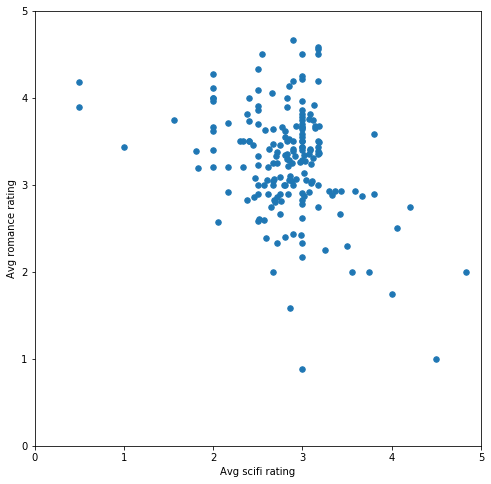

In [7]:
# Plot dataset
helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [8]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

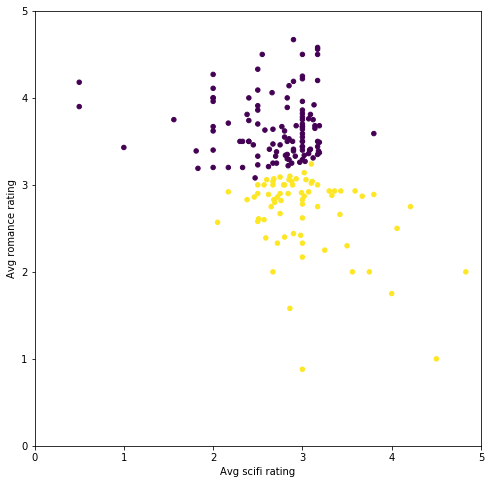

In [9]:
from sklearn.cluster import KMeans

# K-means with 2 clusters
kmeans_2 = KMeans(2)

predictions = kmeans_2.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions)

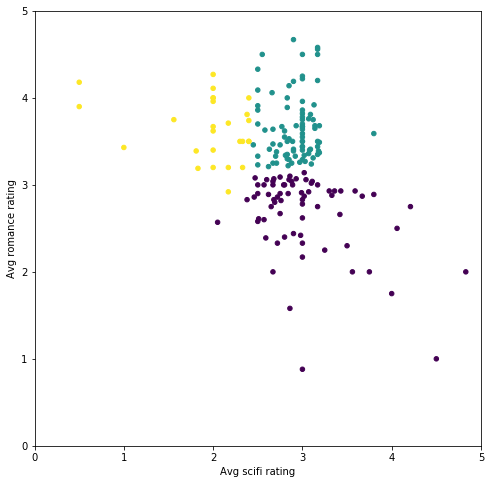

In [10]:
# K-means with 3 clusters
kmeans_3 = KMeans(3)

predictions_3 = kmeans_3.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions_3)

Now the average scifi rating is starting to come into play. The groups are:
 * people who like romance but not scifi
 * people who like scifi but not romance
 * people who like both scifi and romance
 

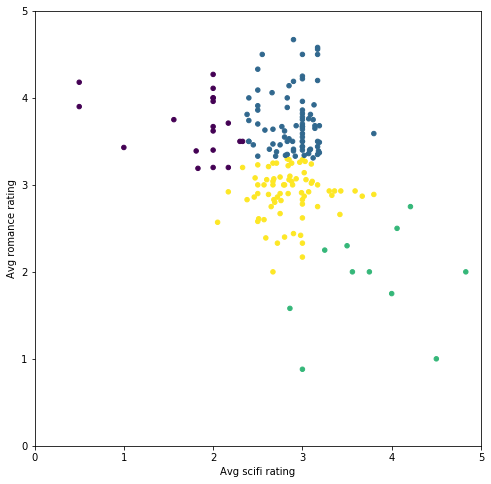

In [11]:
# K-means with 4 clusters
kmeans_4 = KMeans(4)

predictions_4 = kmeans_4.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_4)

In [12]:
# Choose the range of k values
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3862169048216939),
 (12, 0.345588732030238),
 (17, 0.37289993086397827),
 (22, 0.3703070253926067),
 (27, 0.36403283797837627),
 (32, 0.33832584488444833),
 (37, 0.39758559319031017),
 (42, 0.3765484474740451),
 (47, 0.37616970412285633),
 (52, 0.3652640490643906),
 (57, 0.36451536667691126),
 (62, 0.34807963130705993),
 (67, 0.3484055334618025),
 (72, 0.34656938923990566),
 (77, 0.34315152314336256),
 (82, 0.3332392287502194),
 (87, 0.31913740336717217),
 (92, 0.3232739906136727),
 (97, 0.3117686103872169),
 (102, 0.3068905706047613),
 (107, 0.3060430917431004),
 (112, 0.28841426999578623),
 (117, 0.2898776383871896),
 (122, 0.27225457312640494),
 (127, 0.25802920777800853),
 (132, 0.2498803827065369),
 (137, 0.232763081374403),
 (142, 0.2224377070056049),
 (147, 0.19905201126230337),
 (152, 0.18636216200770506),
 (157, 0.1644751402208559),
 (162, 0.14820613734314372),
 (167, 0.1282042757952911),
 (172, 0.10075966098920461),
 (177, 0.0642301201631745),

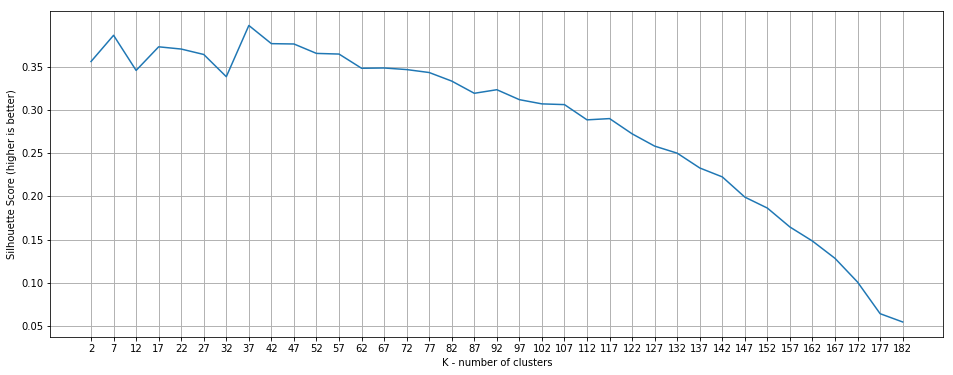

In [13]:
# Plot each of K vs. the silhouette score
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

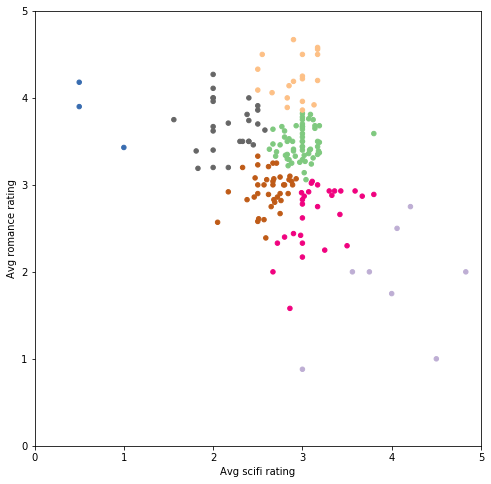

In [14]:
# K-means with 7 clusters
kmeans_7 = KMeans(7)

predictions_7 = kmeans_7.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions_7, cmap='Accent') 

In [15]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [16]:
# Add action ratings
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

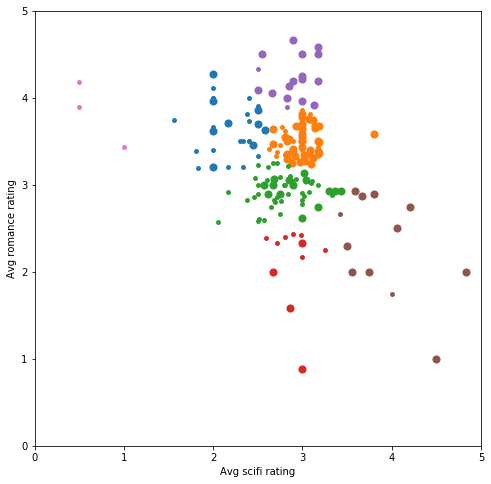

In [17]:
# K-means with 7 clusters
kmeans_7 = KMeans(7)

predictions_7 = kmeans_7.fit_predict(X)

helper.draw_clusters_3d(biased_dataset_3_genres, predictions_7)

## Movie-level Clustering

In [18]:
# Merge the two tables then pivot to get Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


The dominance of NaN values presents the first issue. Most users have not rated and watched most movies.

To get around this, sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region.

In [19]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


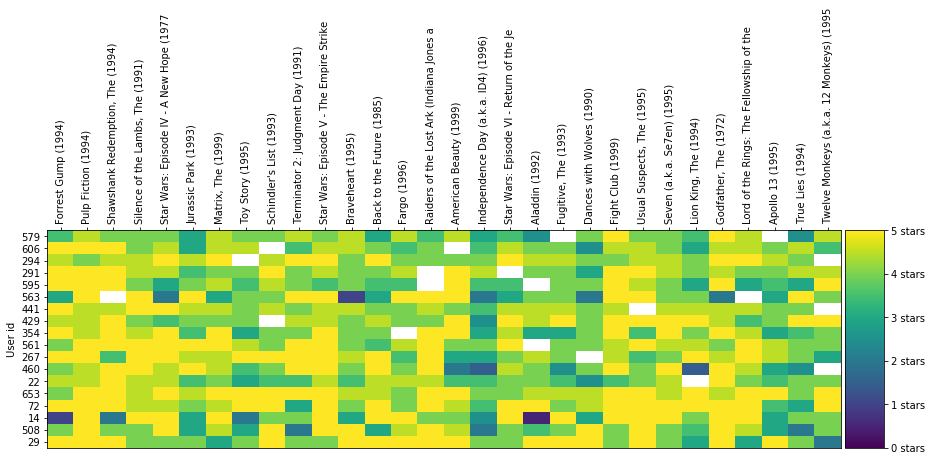

In [20]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

Each column is a movie. Each row is a user. The color of the cell is how the user rated that movie based on the scale on the right of the graph.

For performance reasons, we'll only use ratings for 1000 movies (out of the 9000+ available in the dataset).

In [21]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [22]:
# Create sparse matrix
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [23]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

cluster # 2
# of users in cluster: 280. # of users in plot: 70


C:\Users\jng20\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


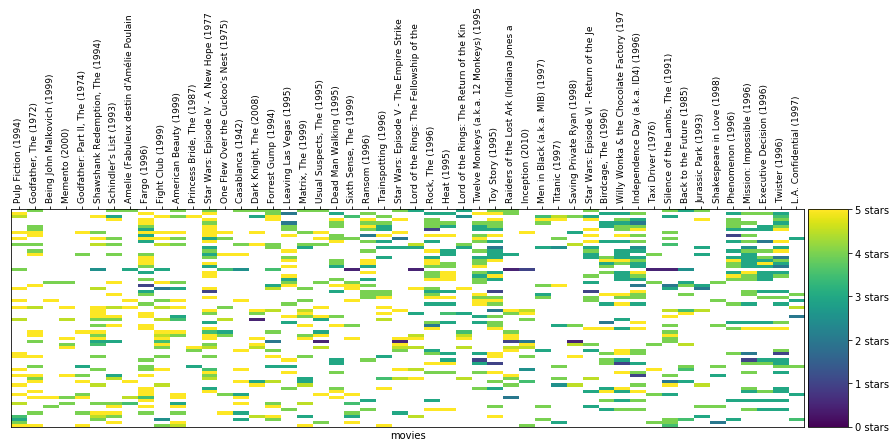

cluster # 9
# of users in cluster: 37. # of users in plot: 37


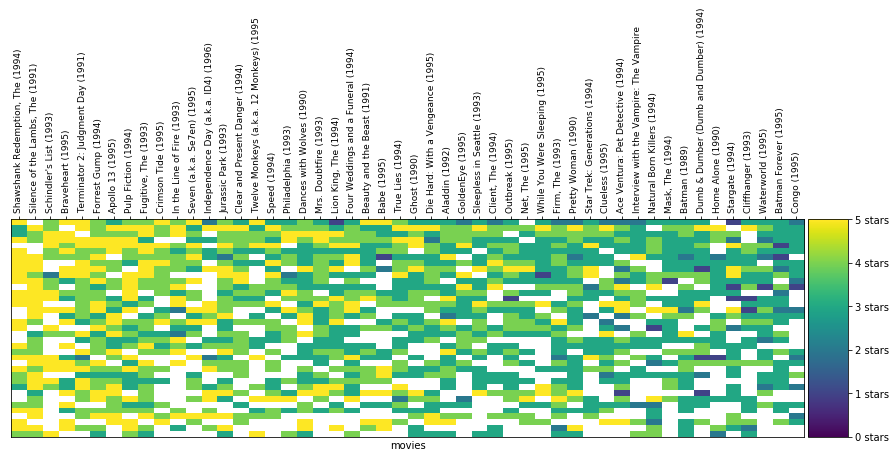

cluster # 18
# of users in cluster: 47. # of users in plot: 47


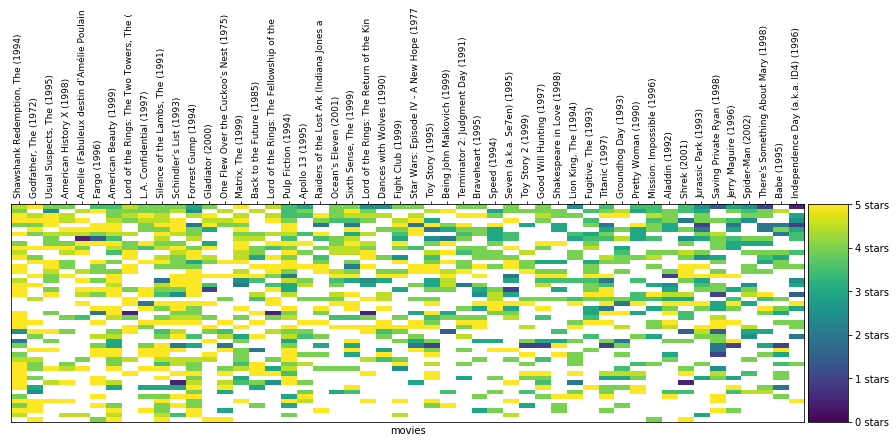

cluster # 5
# of users in cluster: 88. # of users in plot: 70


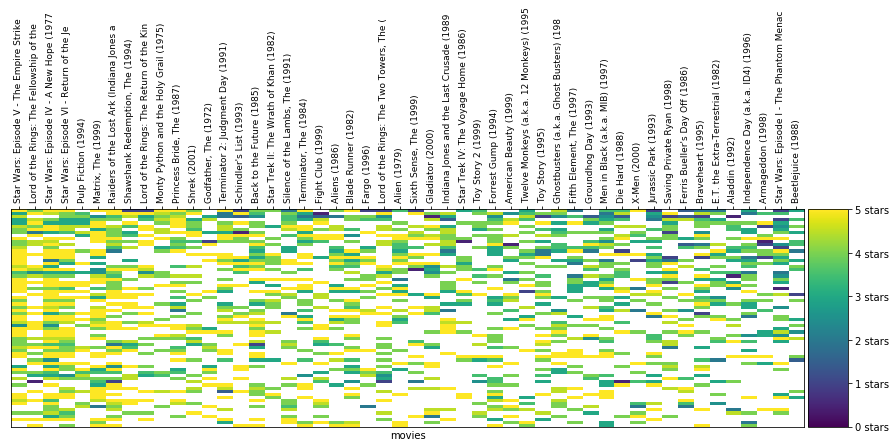

cluster # 4
# of users in cluster: 29. # of users in plot: 29


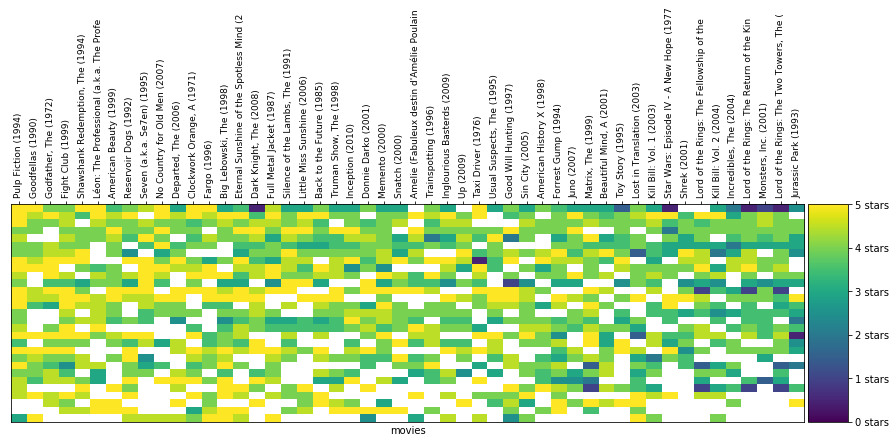

cluster # 14
# of users in cluster: 21. # of users in plot: 21


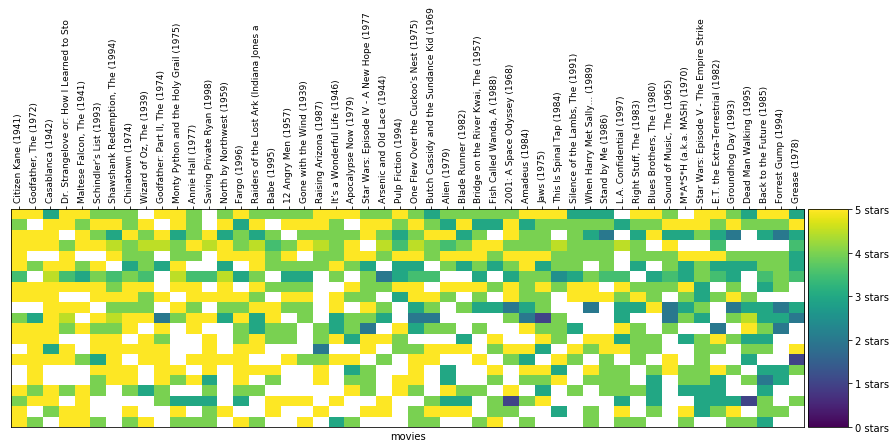

cluster # 11
# of users in cluster: 67. # of users in plot: 67


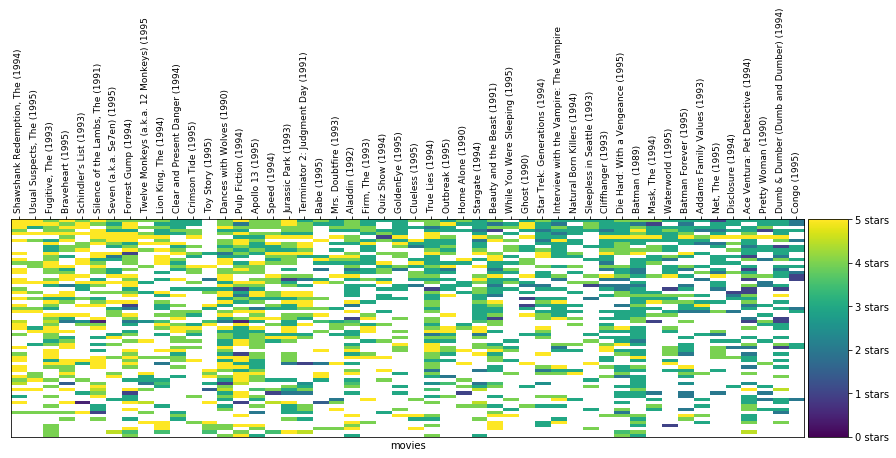

cluster # 17
# of users in cluster: 29. # of users in plot: 29


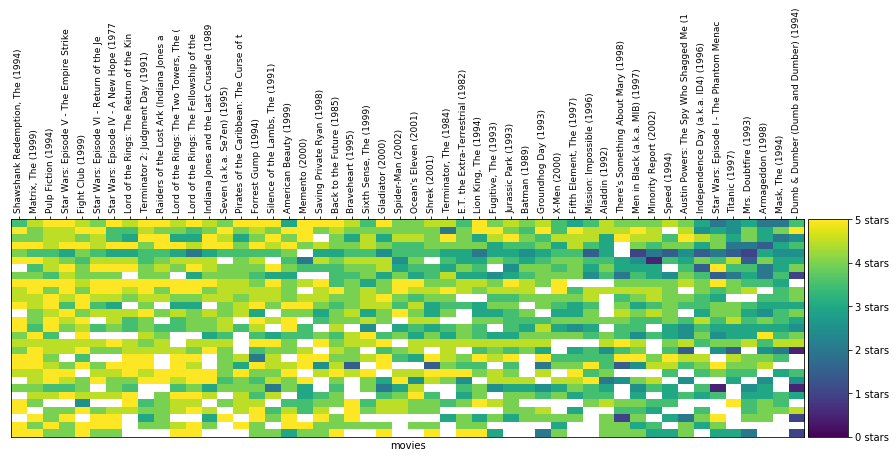

cluster # 3
# of users in cluster: 37. # of users in plot: 37


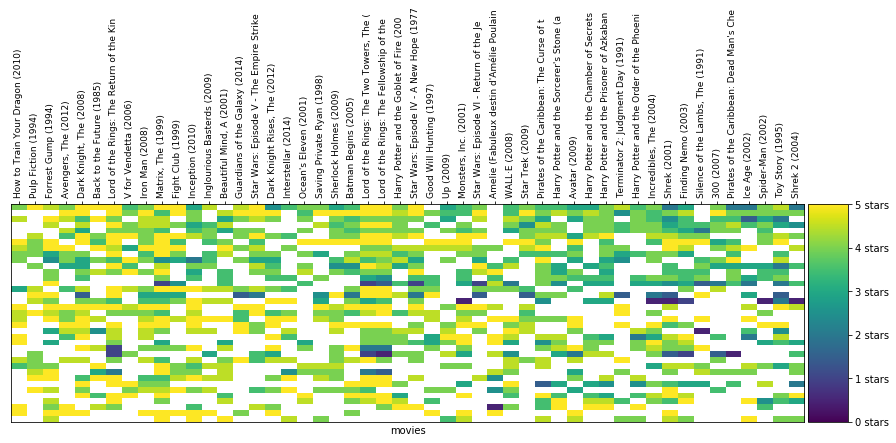

In [24]:
# Visualize clusters as heatmaps
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

There are several things to note here:
* The more similar the ratings in a cluster are, the more **vertical** lines in similar colors you'll be able to trace in that cluster. 
 * Some clusters are more sparse than others, containing people who probably watch and rate less movies than in other clusters.
 * Some clusters are mostly yellow and bring together people who really love a certain group of movies. Other clusters are mostly green or navy blue meaning they contain people who agree that a certain set of movoies deserves 2-3 stars.
 * Note how the movies change in every cluster. The graph filters the data to only show the most rated movies, and then sorts them by average rating.
 * Can you track where the Lord of the Rings movies appear in each cluster? What about Star Wars movies?
* It's easy to spot **horizontal** lines with similar colors, these are users without a lot of variety in their ratings.

## Prediction

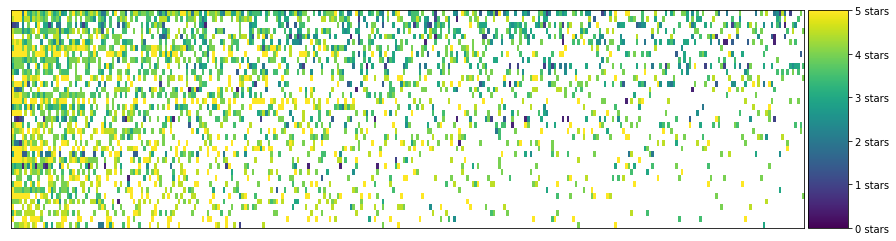

In [34]:
# Pick a cluster
cluster_number = 3

# Filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [35]:
# Actual ratings in the cluster
cluster.fillna('').head()

,"Matrix, The (1999)","Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Fellowship of the Ring, The (2001)","Lord of the Rings: The Return of the King, The (2003)",Shrek (2001),"Dark Knight, The (2008)",Pirates of the Caribbean: The Curse of the Black Pearl (2003),Inception (2010),Iron Man (2008),"Monsters, Inc. (2001)",...,Charlie's Angels (2000),Taxi Driver (1976),"Ring, The (2002)",Airplane! (1980),Star Wars: Episode I - The Phantom Menace (1999),Amadeus (1984),"Hunchback of Notre Dame, The (1996)",Wallace & Gromit in The Curse of the Were-Rabbit (2005),Blade (1998),You've Got Mail (1998)
25,5,5,5,5,2,5,3.5,3,4,3.5,...,1,4.5,2,,1,,,,4,
22,4.5,5,5,5,3,4.5,4.5,3,4.5,4,...,3.5,,4.5,,,,,3.5,,
28,1,1,1.5,,2.5,,4,,,3,...,2,,0.5,,,3.5,2.5,,,
20,4.5,4,4,4,2.5,3.5,3,4,4.5,,...,,,,3.5,,4.5,,,,4
8,5,,,,4.5,,4.5,3.5,,4,...,,,1.5,,,,,,,


## Recommendation

In [36]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Matrix, The (1999)                                               4.220588
Lord of the Rings: The Two Towers, The (2002)                    4.078125
Lord of the Rings: The Fellowship of the Ring, The (2001)        4.078125
Lord of the Rings: The Return of the King, The (2003)            4.250000
Shrek (2001)                                                     3.700000
Dark Knight, The (2008)                                          4.267857
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    3.907407
Inception (2010)                                                 4.153846
Iron Man (2008)                                                  4.230769
Monsters, Inc. (2001)                                            4.020000
Forrest Gump (1994)                                              4.340000
Batman Begins (2005)                                             4.083333
Finding Nemo (2003)                                              3.687500
Incredibles, The (2004)               

In [37]:
# Pick a user id in the cluster
user_id = 8

# Get all this user's ratings
user_ratings  = cluster.loc[user_id, :]

# Get unrated movies
user_unrated_movies =  user_ratings[user_ratings.isnull()]

# Ratings of these movies the user did not rate
avg_ratings = pd.concat([user_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Shawshank Redemption, The (1994)                                                  4.600000
Breakfast Club, The (1985)                                                        4.600000
Monty Python and the Holy Grail (1975)                                            4.500000
Howl's Moving Castle (Hauru no ugoku shiro) (2004)                                4.500000
The Imitation Game (2014)                                                         4.423077
Intouchables (2011)                                                               4.409091
Usual Suspects, The (1995)                                                        4.400000
Harry Potter and the Deathly Hallows: Part 2 (2011)                               4.392857
King's Speech, The (2010)                                                         4.375000
Godfather: Part II, The (1974)                                                    4.333333
Godfather, The (1972)                                                             4.333333